In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Root Finding and Optimization

**GOAL:** Find where $f(x) = 0$.

### Example:  Future Time Annuity

When can I retire?

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] $$

$P$ is payment amount per compounding period

$m$ number of compounding periods per year

$r$ annual interest rate

$n$ number of years to retirement

$A$ total value after $n$ years

If I want to retire in 20 years what does $r$ need to be?

Set $P = \frac{\$18,000}{12} = \$1500, ~~~~ m=12, ~~~~ n=20$.

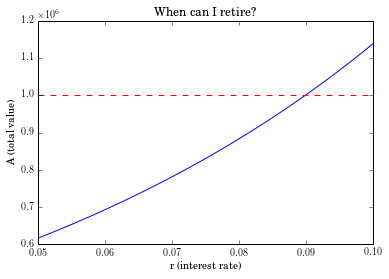

In [10]:
def total_value(P, m, r, n):
    """Total value of portfolio given parameters
    
    Based on following formula:
    
    A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n}
                - 1 \right ] 
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     
     :Returns:
     (float) - total value of portfolio
     
    """
    
    return P / (r / float(m)) * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.05, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, total_value(P, m, r, n))
axes.plot(r, numpy.ones(r.shape) * goal, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("A (total value)")
axes.set_title("When can I retire?")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

## Fixed Point Iteration

How do we go about solving this?

Could try to solve at least partially for $r$:

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = g(r)$$
or 
$$ g(r) - r = 0$$

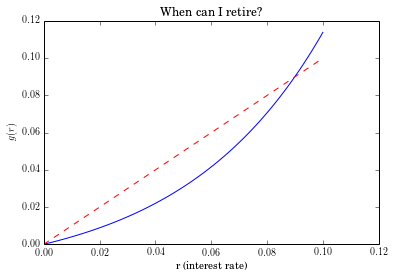

In [30]:
def g(P, m, r, n, A):
    """Reformulated minimization problem
    
    Based on following formula:
    
    g(r) = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ]
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     - *A* (float) - total value after $n$ years
     
     :Returns:
     (float) - value of g(r)
     
    """
    
    return P * m / A * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.00, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, g(P, m, r, n, goal))
axes.plot(r, r, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("$g(r)$")
axes.set_title("When can I retire?")
axes.set_ylim([0, 0.12])
# axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

Guess at $r_0$ and check to see what direction we need to go...

1. $r_0 = 0.0800$, $g(r_0) - r_0 = -0.009317550125425428$
1. $r_1 = 0.0850$, $g(r_1) - r_1 = -0.00505763375972$
1. $r_2 = 0.0875$, $g(r_2) - r_2 = -0.00257275331014$

In [41]:
print g(P, m, 0.08, n, goal) - 0.08
print g(P, m, 0.085, n, goal) - 0.085
print g(P, m, 0.0875, n, goal) - 0.0875

-0.00931755012543
-0.00505763375972
-0.00257275331014


A bit tedious, we can also make this algorithmic:


In [45]:
r = 0.08
for steps in xrange(10):
    print "r = ", r
    print "Residual = ", g(P, m, r, n, goal) - r
    r = g(P, m, r, n, goal)
    print

r =  0.08
Residual =  -0.00931755012543

r =  0.0706824498746
Residual =  -0.014991964496

r =  0.0556904853786
Residual =  -0.0190046399354

r =  0.0366858454432
Residual =  -0.0172372425016

r =  0.0194486029416
Residual =  -0.0108986241178

r =  0.00854997882385
Residual =  -0.00519445475392

r =  0.00335552406992
Residual =  -0.00210625945673

r =  0.00124926461319
Residual =  -0.000793887883434

r =  0.000455376729757
Residual =  -0.000290695449762

r =  0.000164681279994
Residual =  -0.000105298688331



### Example 2:

Let $f(x) = x - e^{-x}$, solve $f(x) = 0$

Equivalent to $x = e^{-x}$ or $x = g(x)$ where $g(x) = e^{-x}$

Note that this problem is equivalent to $x = -\ln x$.

x =  0.4
Residual =  0.270320046036

x =  0.670320046036
Residual =  -0.158775212347

x =  0.511544833689
Residual =  0.0880237954988

x =  0.599568629188
Residual =  -0.0505202007037

x =  0.549048428484
Residual =  0.0284506521954

x =  0.57749908068
Residual =  -0.0161987010418

x =  0.561300379638
Residual =  0.00916637831975



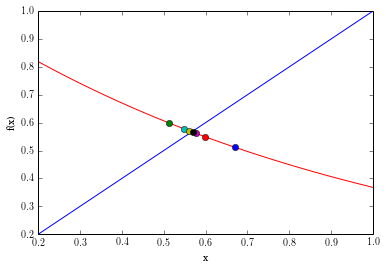

In [79]:
x = numpy.linspace(0.2, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

x = 0.4
for steps in xrange(7):
    print "x = ", x
    print "Residual = ", numpy.exp(-x) - x
    x = numpy.exp(-x)
    print
    axes.plot(x, numpy.exp(-x),'o',)

plt.show()

### Example 3:

Let $f(x) = \ln x + x$ and solve $f(x) = 0$ or $x = -\ln x$.

x =  0.5
Residual =  -0.19314718056



/Users/mandli/src/envs/claw/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


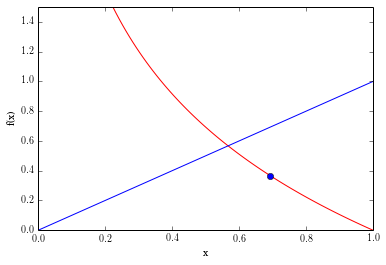

In [95]:
x = numpy.linspace(0.0, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_ylim([0.0, 1.5])

x = 0.5
for steps in xrange(1):
    print "x = ", x
    print "Residual = ", numpy.log(x) + x
    x = -numpy.log(x)
    print
    axes.plot(x, -numpy.log(x),'o',)

plt.show()

These are equivalent problems!  Something is awry...

## Analysis of Fixed Point Iteration

*Theorem*: Existence and uniqueness of fixed point problems

Assume $g \in C[a, b]$, if the range of the mapping $y = g(x)$ satisfies $y \in [a, b]~~~ \forall~~~ x \in [a, b]$ then $g$ has a fixed point in $[a, b]$.

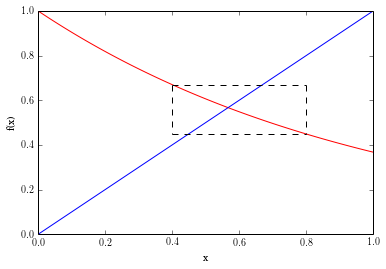

In [87]:
x = numpy.linspace(0.0, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

x = numpy.linspace(0.4, 0.8, 100)
axes.plot(numpy.ones(x.shape) * 0.4, numpy.exp(-x),'--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-x[-1]), '--k')
axes.plot(numpy.ones(x.shape) * 0.8, numpy.exp(-x),'--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-x[0]), '--k')

plt.show()

Additionally, suppose $g'(x)$ is defined for $x \in [a,b]$ and $\exists K < 1$ s.t. $|g'(x)| \leq K < 1 ~~~ \forall ~~~ x \in (a,b)$, then $g$ has a unique fixed point $P \in [a,b]$

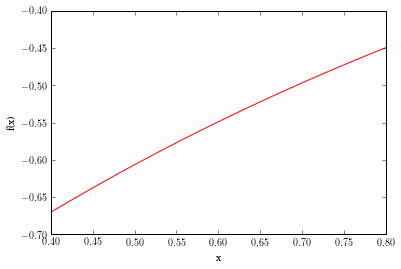

In [91]:
x = numpy.linspace(0.4, 0.8, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.exp(-x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
plt.show()

/Users/mandli/src/envs/claw/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


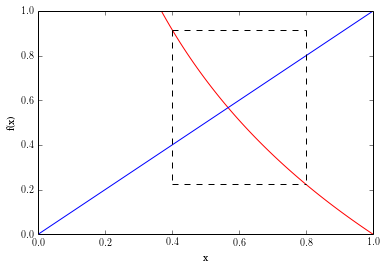

In [96]:
x = numpy.linspace(0.0, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_ylim([0.0, 1.0])

x = numpy.linspace(0.4, 0.8, 100)
axes.plot(numpy.ones(x.shape) * 0.4, -numpy.log(x),'--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(x[-1]), '--k')
axes.plot(numpy.ones(x.shape) * 0.8, -numpy.log(x),'--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(x[0]), '--k')

plt.show()

*Theorem 2*: Asymptotic convergence behavior of fixed point iterations

$$x_{k+1} = g(x_k)$$

Assume that $\exists ~ x^*$ s.t. $x^* = g(x^*)$

$$x_k = x^* + e_k ~~~~~~~~~~~~~~ x_{k+1} = x^* + e_{k+1}$$

$$x^* + e_{k+1} = g(x^* + e_k)$$

Using a Taylor expansion we know

$$g(x^* + e_k) = g(x^*) + g'(x^*) e_k + \frac{g''(c) e_k^2}{2}$$

$$x^* + e_{k+1} = g(x^*) + g'(x^*) e_k + \frac{g''(c) e_k^2}{2}$$

Note that because $x^* = g(x^*)$ these terms cancel leaving

$$e_{k+1} = g'(x^*) e_k + \frac{g''(c) e_k^2}{2}$$

So if $|g'(x^*)| \leq K < 1$ we can conclude that

$$|e_{k+1}| = K |e_k|$$

which shows convergence (although somewhat arbitrarily fast).

### Convergence of iterative schemes

Given any iterative scheme where

$$|e_{k+1}| = C |e_k|^n$$

If $C < 1$ and
 - $n=1$ then the scheme is **linearly convergence**
 - $n=2$ then the scheme exhibits **quadratic convergence**
 - $n > 1$ the scheme can also be called **superlinearly convergent**

If $C > 1$ then the scheme is **divergent**



### Examples Revisited
$g(x) = e^{-x}$ with $x^* \approx 0.56$
 
   $$|g'(x^*)| = |-e^{-x^*}| \approx 0.56$$
   

$g(x) = - \ln x$ with $x^* \approx 0.56$

   $$|g'(x^*)| = \frac{1}{|x^*|} \approx 1.79$$
   

$g(r) = \frac{m P}{A} ((1 + \frac{r}{m})^{mn} - 1)$ with $r^* \approx 0.09$

$$|g'(r^*)| = \frac{P m n}{A} \left(1 + \frac{r}{m} \right)^{m n - 1} \approx 2.15$$

Uhoh... TODO

In [100]:
import sympy
m, P, A, r, n = sympy.symbols('m, P, A, r, n')
(m * P / A * ((1 + r / m)**(m * n) - 1)).diff(r)

P*m*n*(1 + r/m)**(m*n)/(A*(1 + r/m))

## Better ways for root-finding/optimization

If $x^*$ is a fixed point of $g(x)$ then $x^*$ is also a *root* of $f(x^*) = g(x^*) - x^*$ s.t. $f(x^*) = 0$.

